### Data Cleaning

In [4]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C://Users//nitin//Documents//MSBA_6420_Predictive Analytics//Team_Project")

In [3]:
# Read train data
train = pd.read_csv("train.csv", low_memory = False)

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
train.head()

,Unnamed: 0,Unnamed: 0.1,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,totals.totalTransactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode
0,0,0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,(not set),google,organic,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2.0,NaN,NaN,2.0,28.0,NaN,NaN,NaN,(not set),sites.google.com,referral,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2.0,NaN,1.0,1.0,38.0,NaN,NaN,NaN,(not set),(direct),(none),NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Organic S

In [17]:
train["totals.transactionRevenue"].fillna(0, inplace=True)
minimum = np.log1p(np.min(train["totals.transactionRevenue"]))
maximum = np.log1p(np.max(train["totals.transactionRevenue"]))
mean= np.log1p(np.mean(train["totals.transactionRevenue"]))
std= np.log1p(np.std(train["totals.transactionRevenue"]))
print(minimum, maximum, mean, std)

0.0 23.86437469605166 14.119981416495575 17.627228532811486


In [7]:
# Read test data
test = pd.read_csv("test.csv", low_memory = False)

In [6]:
test.head()

,Unnamed: 0,Unnamed: 0.1,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,0,Organic Search,20180511,7460955084541987166,Not Socially Engaged,1526099341,2,1526099341,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,India,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,1,(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,1,1,Direct,20180511,460252456180441002,Not Socially Engaged,1526064483,166,1526064483,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,San Francisco,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,1,(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,2,2,Organic Search,20180511,3461808543879602873,Not Socially Engaged,1526067157,2,1526067157,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,not available in demo dataset,Northern America,NaN,4,NaN,3.0,1,24.0,NaN,NaN,NaN,1,(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
3,3,3,Direct,20180511,975129477712150630,Not Socially Engaged,1526107551,4,1526107551,Chrome,not availabl

In [18]:
# Drop unnnamed columns
train = train.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
test = test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [19]:
# Find data shape
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1708337, 58)
Test shape: (401589, 57)


In [9]:
# Find data type
print(train.dtypes.value_counts())

object     42
float64     9
int64       6
bool        1
dtype: int64


In [20]:
col_with_constant = pd.DataFrame({'uniq_counts': [col for col in train.columns if train[col].nunique() == 1]})
print("Columns with constant value: ", len(col_with_constant), "columns")
print("Name of constant columns: \n", col_with_constant)

Columns with constant value:  24 columns
Name of constant columns: 
                                           uniq_counts
0                                socialEngagementType
1                               device.browserVersion
2                                  device.browserSize
3                       device.operatingSystemVersion
4                         device.mobileDeviceBranding
5                            device.mobileDeviceModel
6                          device.mobileInputSelector
7                             device.mobileDeviceInfo
8                    device.mobileDeviceMarketingName
9                                 device.flashVersion
10                                    device.language
11                                device.screenColors
12                            device.screenResolution
13                                  geoNetwork.cityId
14                                geoNetwork.latitude
15                               geoNetwork.longitude
16           

In [22]:
constant_cols = col_with_constant['uniq_counts'].tolist()
constant_df = train[constant_cols]
constant_df.head()

,socialEngagementType,device.browserVersion,device.browserSize,device.operatingSystemVersion,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,geoNetwork.cityId,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.bounces,totals.newVisits,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode
0,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1.0,1.0,not available in demo dataset,NaN,NaN,NaN
1,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN
2,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,NaN,1.0,not available in demo dataset,True,NaN,NaN
3,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,NaN,1.0,not available in demo dataset,NaN,NaN,NaN
4,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,NaN,1.0,not available in demo dataset,NaN,NaN,NaN


In [23]:
drop = ['totals.visits', 'totals.bounces', 'totals.newVisits']
for i in drop:
    constant_cols.remove(i)

In [24]:
# drop columns with constant value from train data
train = train.drop(columns = constant_cols, axis=1)

In [25]:
# drop columns with constant value from test data
col_with_constant_t = pd.DataFrame({'uniq_counts': [col for col in test.columns if test[col].nunique() == 1]})
print("Columns with constant value: ", len(col_with_constant_t), "columns")
print("Name of constant columns: \n", col_with_constant_t)

Columns with constant value:  23 columns
Name of constant columns: 
                                           uniq_counts
0                                socialEngagementType
1                                  device.browserSize
2                               device.browserVersion
3                                 device.flashVersion
4                                     device.language
5                         device.mobileDeviceBranding
6                             device.mobileDeviceInfo
7                    device.mobileDeviceMarketingName
8                            device.mobileDeviceModel
9                          device.mobileInputSelector
10                      device.operatingSystemVersion
11                                device.screenColors
12                            device.screenResolution
13                                  geoNetwork.cityId
14                                geoNetwork.latitude
15                               geoNetwork.longitude
16           

In [26]:
constant_cols_t = col_with_constant_t['uniq_counts'].tolist()
constant_df_t = test[constant_cols_t]
constant_df_t.head()

,socialEngagementType,device.browserSize,device.browserVersion,device.flashVersion,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.cityId,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.bounces,totals.newVisits,totals.visits,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect
0,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,NaN,1,not available in demo dataset,NaN,True
1,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,NaN,1,not available in demo dataset,NaN,True
2,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,NaN,1,not available in demo dataset,NaN,True
3,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,NaN,1,not available in demo dataset,NaN,True
4,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,1.0,1,not available in demo dataset,NaN,NaN


In [27]:
drop = ['totals.visits', 'totals.bounces', 'totals.newVisits']
for i in drop:
    constant_cols_t.remove(i)
    
# drop columns with constant value from train data
test = test.drop(columns = constant_cols_t, axis=1)

In [28]:
test.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20180511,7460955084541987166,1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,1,(not set),NaN,NaN,NaN,NaN,(not set),(not provided),organic,(not set),google
1,Direct,20180511,460252456180441002,1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,1,(not set),NaN,NaN,NaN,NaN,(not set),(not set),(none),(not set),(direct)
2,Organic Search,20180511,3461808543879602873,1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,NaN,4,NaN,3.0,1,24.0,NaN,NaN,NaN,1,(not set),NaN,NaN,NaN,NaN,(not set),(not provided),organic,(not set),google
3,Direct,20180511,975129477712150630,1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,NaN,5,NaN,4.0,1,25.0,NaN,NaN,NaN,1,(not set),NaN,NaN,NaN,NaN,(not set),(not set),(none),(not set),(direct)
4,Organic Search,20180511,8381672768065729990,1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,NaN,5,1.0,4.0,1,49.0,NaN,NaN,NaN,1,(not set),NaN,NaN,NaN,NaN,(not set),(not provided),organic,(not set),google


In [29]:
# Print data shape after dropping constant columns
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1708337, 37)
Test shape: (401589, 37)


In [19]:
# Find if there's missing value in data
def find_missing(data):
    #find the features that have missing values
    count_missing=data.isnull().sum().values
    total=data.shape[0]
    ratio_missing=count_missing/total
    return pd.DataFrame({'missing_count':count_missing,'missing_ratio':ratio_missing},
                                   index=data.columns.values)

train_missing=find_missing(train)
test_missing=find_missing(test)

#merge the train and test missing ratio 
train_missing.reset_index()[['index','missing_ratio']].merge(test_missing.reset_index()[['index','missing_ratio']],on='index',how='left')\
                  .rename(columns={'index':'columns','missing_ratio_x':'train_missing_ratio','missing_ratio_y':'test_missing_ratio'})\
                  .sort_values(['train_missing_ratio','test_missing_ratio'],ascending=False).query('train_missing_ratio>0')


,columns,train_missing_ratio,test_missing_ratio
25,totals.transactionRevenue,0.989163,0.988560
26,totals.totalTransactionRevenue,0.989163,0.988560
24,totals.transactions,0.989136,0.984300
32,trafficSource.adContent,0.962105,0.000000
33,trafficSource.adwordsClickInfo.page,0.955937,0.973592
34,trafficSource.adwordsClickInfo.slot,0.955937,0.973592
36,trafficSource.adwordsClickInfo.adNetworkType,0.955937,0.973592
35,trafficSource.adwordsClickInfo.gclId,0.955850,0.973575
31,trafficSource.referralPath,0.668529,0.000000
30,trafficSource.keyword,0.616260,0.100167


In [20]:
# Find numerical columns in train data
numeric_features_train = train.select_dtypes(include=[np.number])
numeric_features_train.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.sessionQualityDim', 'totals.timeOnSite', 'totals.transactions',
       'totals.transactionRevenue', 'totals.totalTransactionRevenue',
       'trafficSource.adwordsClickInfo.page'],
      dtype='object')

In [21]:
# Find numerical columns in test data
numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.sessionQualityDim', 'totals.timeOnSite',
       'totals.totalTransactionRevenue', 'totals.transactionRevenue',
       'totals.transactions', 'totals.visits',
       'trafficSource.adwordsClickInfo.page'],
      dtype='object')

In [22]:
# Find categorical columns in train data
categorical_features_train = train.select_dtypes(include=[np.object])
categorical_features_train.columns

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.referralPath', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType'],
      dtype='object')

In [23]:
# Find categorical columns in test data
categorical_features_test = test.select_dtypes(include=[np.object])
categorical_features_test.columns

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.deviceCategory', 'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dtype='object')

In [24]:
miss_cols = ['trafficSource.adContent', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.page',
'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.adNetworkType',
'trafficSource.adwordsClickInfo.gclId', 'trafficSource.referralPath', 'trafficSource.keyword',
'totals.timeOnSite', 'totals.bounces', 'totals.sessionQualityDim', 'totals.newVisits', 'totals.pageviews']

In [25]:
len(miss_cols)

13

In [26]:
num_cols = numeric_features_train.columns.tolist()

In [27]:
for col in miss_cols:
    print(col, pd.DataFrame(train[col].unique()))

trafficSource.adContent                                   0
0                               NaN
1   Placement Accessories 300 x 250
2          Google Merchandise Store
3                      Bags 300x250
4        Display Ad created 3/11/14
..                              ...
72                   GA Help Center
73                   Free Shipping!
74             Swag w/ Google Logos
75        Men's Apparel from Google
76                  Ad from 2/17/17

[77 rows x 1 columns]
trafficSource.adContent                                   0
0                               NaN
1   Placement Accessories 300 x 250
2          Google Merchandise Store
3                      Bags 300x250
4        Display Ad created 3/11/14
..                              ...
72                   GA Help Center
73                   Free Shipping!
74             Swag w/ Google Logos
75        Men's Apparel from Google
76                  Ad from 2/17/17

[77 rows x 1 columns]
trafficSource.adwordsClickInfo.page       

In [28]:
train['trafficSource.adContent'].value_counts()

Google Merchandise Store          39566
Google Merchandise Collection      6762
Placement Accessores 300 x 250     3040
Smart display ad - 8/17/2017       2664
Display Ad created 3/11/14         2344
                                  ...  
google store                          2
Google Apparel                        1
GA Help Center                        1
Men's Apparel from Google             1
Swag w/ Google Logos                  1
Name: trafficSource.adContent, Length: 76, dtype: int64

In [29]:
# Fill nan numeric value with zero
miss_col_num = ['trafficSource.adwordsClickInfo.page', 'totals.timeOnSite', 'totals.bounces', 'totals.sessionQualityDim', 'totals.newVisits',
               'totals.pageviews']
def fill_na_num(df):
    for col in miss_col_num:
        df[col] = train[col].fillna(0).astype(int)
    return df

In [30]:
train = fill_na_num(train)
test = fill_na_num(test)

In [31]:
cat_cols = ['channelGrouping',
 'device.browser',
 'device.isMobile',
 'device.operatingSystem',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.networkDomain',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword',
 'trafficSource.referralPath',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.adNetworkType']

In [32]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:

    le = LabelEncoder()
    train_vals = list(train[col].values.astype(str))
    test_vals = list(test[col].values.astype(str))
    
    le.fit(train_vals + test_vals)
    
    train[col] = le.transform(train_vals)
    test[col] = le.transform(test_vals)

In [33]:
train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,totals.totalTransactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType
0,4,20171016,3162355547410993243,1508198450,1,1508198450,64,22,0,0,4,22,75,517,129,1096,0,1,1,1,1,1,1,0,NaN,NaN,NaN,4,117,5,3761,3757,86,0,5,67994,3
1,6,20171016,8934116514970143966,1508176307,6,1508176307,55,3,0,0,2,12,219,74,104,256,0,1,2,2,0,0,2,28,NaN,NaN,NaN,4,339,6,3086,339,86,0,5,67994,3
2,2,20171016,7992466427990357681,1508201613,1,1508201613,55,1,1,1,2,12,219,517,129,1096,47195,1,2,2,0,1,1,38,NaN,NaN,NaN,4,0,0,3086,3757,86,0,5,67994,3
3,4,20171016,9075655783635761930,1508169851,1,1508169851,55,22,0,0,3,21,211,517,129,1096,44691,1,2,2,0,1,1,1,NaN,NaN,NaN,4,117,5,8,3757,86,0,5,67994,3
4,4,20171016,6960673291025684308,1508190552,1,1508190552,55,22,0,0,2,3,132,517,129,1096,33811,1,2,2,0,1,1,52,NaN,NaN,NaN,4,117,5,8,3757,86,0,5,67994,3


In [34]:
test.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,4,20180511,7460955084541987166,1526099341,2,1526099341,55,1,1,1,1,3,93,0,44691,126,18,1,4,1,1,1,0,NaN,NaN,NaN,1,0,3,67994,0,5,4,8,5,0,117
1,2,20180511,460252456180441002,1526064483,166,1526064483,55,0,0,7,858,2,219,104,0,74,12,0,4,0,2,2,28,NaN,NaN,NaN,1,0,3,67994,0,5,4,9,0,0,0
2,4,20180511,3461808543879602873,1526067157,2,1526067157,55,0,0,3,1096,2,219,129,31310,517,12,0,4,1,2,1,38,NaN,NaN,NaN,1,0,3,67994,0,5,4,8,5,0,117
3,2,20180511,975129477712150630,1526107551,4,1526107551,55,1,1,25,417,2,219,48,0,462,12,0,5,1,2,1,1,NaN,NaN,NaN,1,0,3,67994,0,5,4,9,0,0,0
4,4,20180511,8381672768065729990,1526060254,1,1526060254,71,2,1,22,432,2,219,64,8820,74,12,0,5,1,2,1,52,NaN,NaN,NaN,1,0,3,67994,0,5,4,8,5,0,117


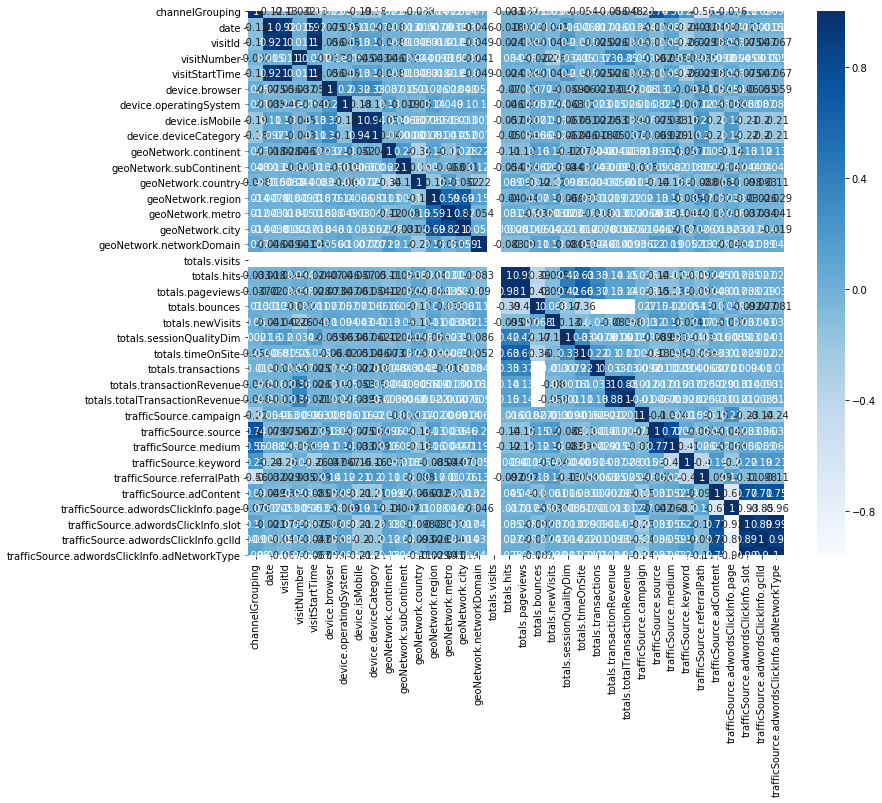

In [35]:
# Find correlation between variables

plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [36]:
# Transfer datetime data
def date_converter(df):
    df['date'] = df['date'].astype(str)
    df["date"] = df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    df["date"] = pd.to_datetime(df["date"])
    
    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    return df

In [38]:
train = date_converter(train)

In [40]:
test = date_converter(test)

In [39]:
train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,totals.totalTransactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,month,day,weekday
0,4,2017-10-16,3162355547410993243,1508198450,1,1508198450,64,22,0,0,4,22,75,517,129,1096,0,1,1,1,1,1,1,0,NaN,NaN,NaN,4,117,5,3761,3757,86,0,5,67994,3,10,16,0
1,6,2017-10-16,8934116514970143966,1508176307,6,1508176307,55,3,0,0,2,12,219,74,104,256,0,1,2,2,0,0,2,28,NaN,NaN,NaN,4,339,6,3086,339,86,0,5,67994,3,10,16,0
2,2,2017-10-16,7992466427990357681,1508201613,1,1508201613,55,1,1,1,2,12,219,517,129,1096,47195,1,2,2,0,1,1,38,NaN,NaN,NaN,4,0,0,3086,3757,86,0,5,67994,3,10,16,0
3,4,2017-10-16,9075655783635761930,1508169851,1,1508169851,55,22,0,0,3,21,211,517,129,1096,44691,1,2,2,0,1,1,1,NaN,NaN,NaN,4,117,5,8,3757,86,0,5,67994,3,10,16,0
4,4,2017-10-16,6960673291025684308,1508190552,1,1508190552,55,22,0,0,2,3,132,517,129,1096,33811,1,2,2,0,1,1,52,NaN,NaN,NaN,4,117,5,8,3757,86,0,5,67994,3,10,16,0


In [37]:
# Select numerical columns

In [39]:
print('Training Period:', train['date'].min(), train['date'].max())
print('Test Period:', test['date'].min(), test['date'].max())

Training Period: 20160801 20180430
Test Period: 20180501 20181015


In [38]:
# Devide the data by time window
test_days = test['date'].max() - test['date'].min()
train_days = train['date'].max() - train['date'].min()
print(test_days)
print(train_days)

514
19629


In [34]:
# Split the interval by 167 days
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%d') for dt in 
       datetime_range(datetime(2016, 8, 1), datetime(2018, 10, 15), 
       timedelta(days=167))]

In [36]:
dts

['2016-08-01', '2017-01-15', '2017-07-01', '2017-12-15', '2018-05-31']

In [37]:
mask_1 = (train['date'] >= '2016-08-01') & (train['date'] < '2017-01-15')
mask_2 = (train['date'] >= '2017-01-15') & (train['date'] < '2017-07-01')
mask_3 = (train['date'] >= '2017-07-01') & (train['date'] < '2017-12-15')
mask_4 = (train['date'] >= '2017-12-15') & (train['date'] < '2018-05-31')

train_p1 = train.loc[mask_1]
train_p2 = train.loc[mask_2]
train_p3 = train.loc[mask_3]
train_p4 = train.loc[mask_4]

TypeError: Invalid comparison between dtype=int64 and str

In [60]:
# Group by fullVisitorId
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

agg_dict = {}
for col in ['totals.visits', 'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits', 'totals.sessionQualityDim', 'totals.timeOnSite', 'totals.transactions', 'totals.transactionRevenue', 'totals.totalTransactionRevenue']:
    train[col] = train[col].astype('float')
    agg_dict[col] = "sum"
    tmp_1 = train_p1.groupby("fullVisitorId").agg(agg_dict).reset_index()
    tmp_2 = train_p2.groupby("fullVisitorId").agg(agg_dict).reset_index()
    tmp_3 = train_p3.groupby("fullVisitorId").agg(agg_dict).reset_index()
    tmp_4 = train_p4.groupby("fullVisitorId").agg(agg_dict).reset_index()
    test_tmp = test.groupby("fullVisitorId").agg(agg_dict).reset_index()


In [62]:
tmp_1.sort_values(by='totals.transactionRevenue', ascending=False)

,fullVisitorId,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,totals.totalTransactionRevenue
211401,5632276788326171571,6,153,105,2,1,0,2695,1.0,1.602375e+10,1.603275e+10
281746,7496147812697146114,3,23,21,1,1,0,901,1.0,6.996500e+09,7.003500e+09
73130,1956307607572137989,29,964,710,2,1,0,19649,10.0,5.178710e+09,7.092210e+09
186887,4984366501121503466,12,347,282,2,1,0,15399,10.0,4.885870e+09,4.991370e+09
299388,7965265156545901045,6,156,113,1,1,0,2823,1.0,4.847600e+09,4.849600e+09
...,...,...,...,...,...,...,...,...,...,...,...
126083,3364900675775949537,1,1,1,1,1,0,0,0.0,0.000000e+00,0.000000e+00
126082,3364868090502366286,1,2,2,0,1,0,4,0.0,0.000000e+00,0.000000e+00
126081,3364854146163073025,1,1,1,1,1,0,0,0.0,0.000000e+00,0.000000e+00
126080,3364752878337597335,2,4,4,0,1,0,25,0.0,0.000000e+00,0.000000e+00
